Nivel 2: Clasificación (Detector de Fraude)
Dejamos de predecir números (dinero) para predecir categorías (Sí/No, Perro/Gato, Fraude/Legal).

Concepto Clave: Regresión Logística Aunque se llama "regresión", se usa para clasificar. En lugar de una línea recta, dibuja una curva en forma de "S" (Sigmoide) que va de 0 a 1 (probabilidad).

* Si el resultado es < 0.5 -> Clase 0 (No Fraude).
* Si el resultado es > 0.5 -> Clase 1 (Fraude).

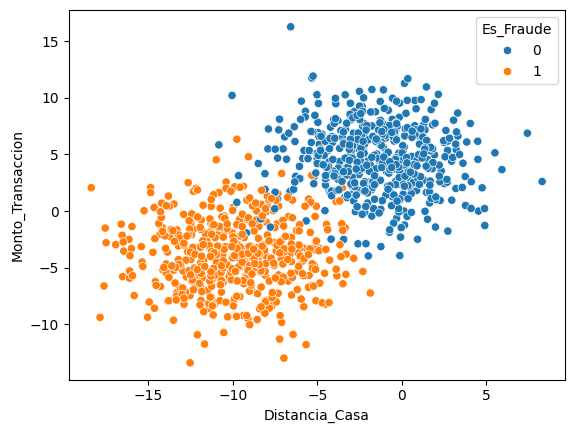

In [1]:
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Generamos datos sintéticos agrupados (Clusters)
# n_samples=1000 transacciones
# centers=2 (0=Legal, 1=Fraude)
# n_features=2 (Distancia_Casa, Monto_Transaccion)
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)

# Lo convertimos a DataFrame para que sea amigable
df_banco = pd.DataFrame(X, columns=['Distancia_Casa', 'Monto_Transaccion'])
df_banco['Es_Fraude'] = y

# Visualicemos el fraude
# El color (hue) nos dirá si es fraude o no
sns.scatterplot(data=df_banco, x='Distancia_Casa', y='Monto_Transaccion', hue='Es_Fraude')
plt.show()

Tu Misión (Nivel 2)
1) Prepara los datos:

   * Define X (Distancia y Monto) e y (Es_Fraude).
   * Haz el train_test_split (test_size=0.3).

In [2]:
X=df_banco[['Distancia_Casa','Monto_Transaccion']]
y=df_banco[['Es_Fraude']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

2) El Modelo:

   * Importa LogisticRegression desde sklearn.linear_model.
   * Instancia y entrena (fit).

In [3]:
modelo=LogisticRegression()
modelo.fit(X_train, y_train)

c:\Users\Dark7 120gb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


3) Evaluación (Lo Nuevo):

   * En clasificación, el R2 no sirve. Usamos la Matriz de Confusión (cuántos fraudes detectó vs cuántos se le escaparon).
   * Importa: from sklearn.metrics import classification_report, confusion_matrix.
   * Predice sobre X_test.
   * Imprime print(confusion_matrix(y_test, predicciones)) y print(classification_report(y_test, predicciones)).

In [ ]:
prediccion=modelo.predict(X_test)
print("--- Matriz de Confusión ---")
print(confusion_matrix(y_test, prediccion))
#una matriz de 2x2 (la matriz de confusión)
# True Negative             / False Positive
# (Aciertos: Gente honesta) / (Alarma Falsa: Molestamos al cliente)
# False Negative                     / True Positive 
# (Peligro: Se nos escapó el ladrón) / (Éxito: Atrapamos al ladrón)
print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, prediccion))

--- Matriz de Confusión ---
[[139   3]
 [  3 155]]

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       142
           1       0.98      0.98      0.98       158

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

